In [355]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')
from nltk import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [356]:
df = pd.read_csv('/content/emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [357]:
df['text']=df['text'].str.replace('Subject', '')
df

,text,spam
0,: naturally irresistible your corporate identi...,1
1,: the stock trading gunslinger fanny is merri...,1
2,: unbelievable new homes made easy im wanting...,1
3,: 4 color printing special request additional...,1
4,": do not have money , get software cds from he...",1
...,...,...
5723,: re : research and development charges to gpg...,0
5724,": re : receipts from visit jim , thanks agai...",0
5725,: re : enron case study update wow ! all on t...,0
5726,": re : interest david , please , call shirle...",0


In [358]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [360]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [361]:
df.duplicated().sum()

33

In [362]:
all_duplicates = df[df.duplicated()]
print(all_duplicates)

                                                   text  spam
2155  : research allocations to egm  hi becky ,  vin...     0
2260  : departure of grant masson  the research grou...     0
2412  : re : schedule and more . .  jinbaek ,  may 3...     0
2473  : day off tuesday  stinson ,  i would like to ...     0
2763  : re : your mail  zhendong ,  dr . kaminski ca...     0
3123  : re : grades  pam ,  the students resent the ...     0
3152  : tiger evals - attachment  tiger hosts :  i u...     0
3248  : re : i am zhendong  zhendong ,  thanks . ple...     0
3249  : hello from enron  dear dr . mcmullen ,  a fe...     0
3387  : term paper  dr . kaminski ,  attached please...     0
3573  : telephone interview with the enron research ...     0
3660  : re : summer work . .  jinbaek ,  this is a p...     0
3690  : re : weather and energy price data  mulong ,...     0
3823  : research get - together at sandeep kohli ' s...     0
4203  : re : willow and pathstar evaluations  mike ,...     0
4390  : 

In [363]:
#df.drop_duplicates(inplace=True)


In [364]:
df['spam'].value_counts()


0    4360
1    1368
Name: spam, dtype: int64

<Axes: >

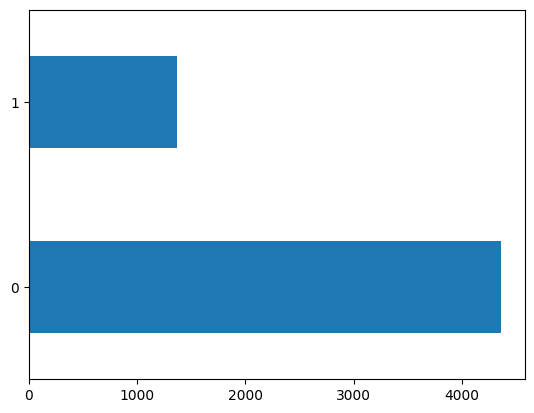

In [365]:
df['spam'].value_counts().plot(kind = 'barh')
#1 spam, 0 not spam

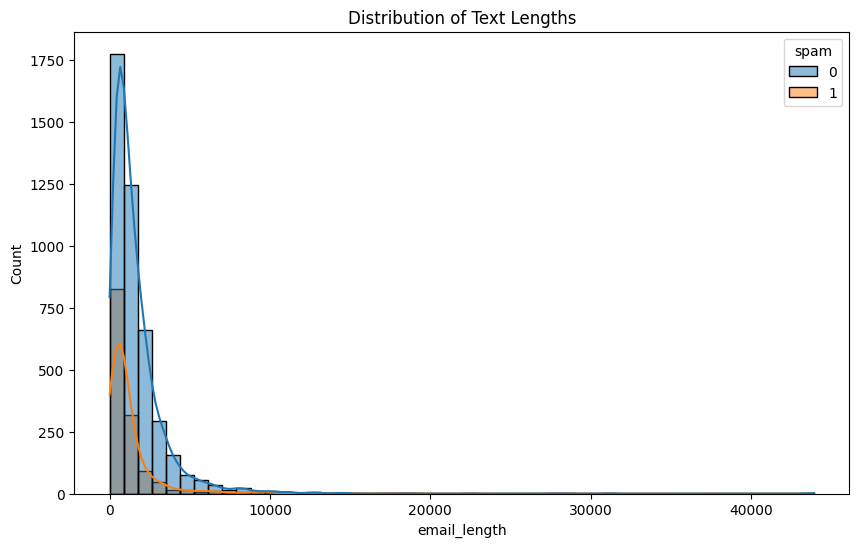

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
df['email_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='email_length', hue='spam', bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

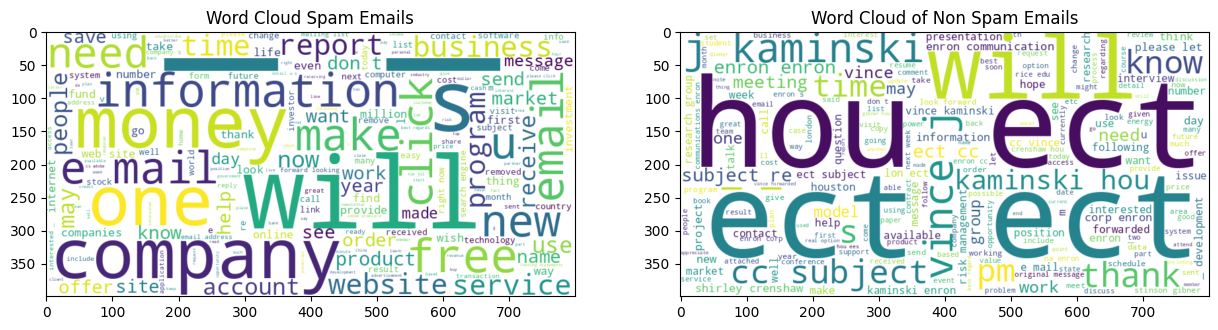

In [367]:
from wordcloud import WordCloud

#frequency of words
spam = ' '.join(df[df['spam'] == 1]['text'])
nonspam = ' '.join(df[df['spam'] == 0]['text'])

# Plot word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
cloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam)
plt.imshow(cloud_spam, interpolation='bilinear')
plt.title('Word Cloud Spam Emails')

plt.subplot(1, 2, 2)
cloud_nonspam = WordCloud(width=800, height=400, background_color='white').generate(nonspam)
plt.imshow(cloud_nonspam, interpolation='bilinear')
plt.title('Word Cloud of Non Spam Emails')

plt.show()

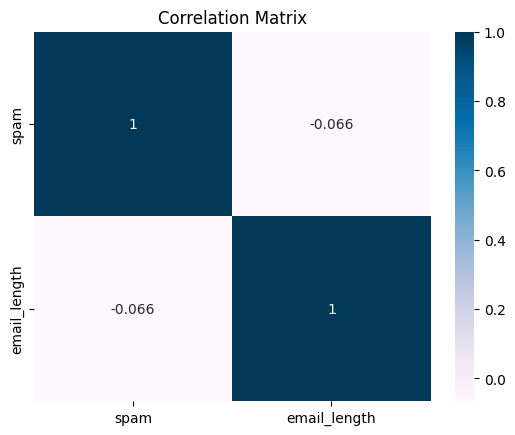

In [368]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap='PuBu')
plt.title('Correlation Matrix')
plt.show()

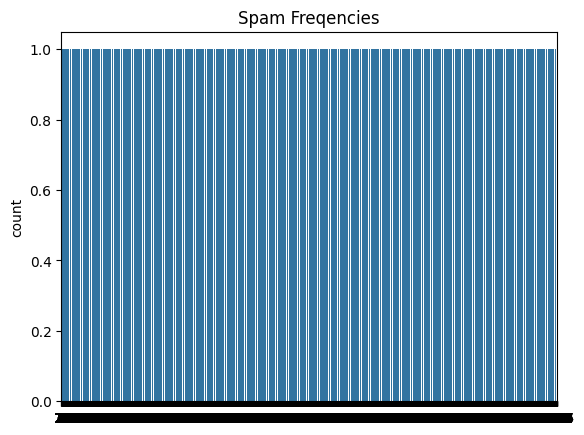

In [369]:
plt.figure()
sns.countplot(df['spam'])
plt.title("Spam Freqencies")
plt.show()

In [370]:
def wordcount(text):
    words = word_tokenize(text)
    return len(words)

In [371]:
df['count']=df['text'].apply(wordcount)
df['count']

0       324
1        89
2        87
3        98
4        52
       ... 
5723    297
5724    244
5725    515
5726    276
5727    444
Name: count, Length: 5728, dtype: int64

In [372]:
def cleanText(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)


    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

df['text']=df['text'].apply(cleanText)

In [373]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])
df['text']=df['text'].apply(stemming)

In [374]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
email = vectorizer.fit_transform(df['text'])

In [376]:
y = df.pop('spam')

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

xtrain, xtest, ytrain, ytest = train_test_split(email,y,test_size=0.20)

nb= MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)



In [378]:
accuracy = accuracy_score(ytest, ypred)
accuracy * 100



99.3891797556719

In [379]:
conf_matrix = confusion_matrix(ytest, ypred)
classification_rep = classification_report(ytest, ypred)

In [380]:
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.99

Confusion Matrix:
[[873   4]
 [  3 266]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       0.99      0.99      0.99       269

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

